<a href="https://colab.research.google.com/github/I-ULISES-I/Colabfiles/blob/main/practicasregresionlasso_ridge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Instrucciones y Objetivos para la Pr√°ctica: Regresi√≥n Lasso y Ridge**

#### **üìå Objetivos de la Pr√°ctica:**  
Al finalizar esta pr√°ctica, los estudiantes ser√°n capaces de:  
1. **Realizar un An√°lisis Exploratorio de Datos (EDA)** completo, incluyendo visualizaci√≥n de distribuciones, detecci√≥n de outliers y an√°lisis de correlaciones.  
2. **Preprocesar datos** correctamente, manejando valores faltantes, codificando variables categ√≥ricas y escalando caracter√≠sticas.  
3. **Implementar modelos de regresi√≥n Lasso y Ridge**, entendiendo c√≥mo la regularizaci√≥n afecta los coeficientes.  
4. **Verificar los supuestos de la regresi√≥n lineal** (linealidad, normalidad de residuos, homocedasticidad y multicolinealidad).  
5. **Comparar el rendimiento** de ambos modelos y analizar qu√© variables son m√°s relevantes en cada caso.  

---

### **üìã Instrucciones**  

#### **üîπ Paso 1: Configuraci√≥n Inicial**
‚úÖ Carga el set de datos que puedes encontrar en el campus virtual
‚úÖ Ejecutar las celdas de importaci√≥n de librer√≠as y carga del dataset.  
‚úÖ Familiarizarse con los datos usando `.head()`, `.info()` y `.describe()`.  

#### **üîπ Paso 2: An√°lisis Exploratorio (EDA)**  
üìä **Para variables num√©ricas:**  
- Generar histogramas y boxplots para identificar distribuciones y outliers.  
- Calcular medidas de tendencia central y dispersi√≥n.  

üìä **Para variables categ√≥ricas:**  
- Usar gr√°ficos de barras para visualizar frecuencias.    

#### **üîπ Paso 3: Matriz de Correlaci√≥n**  
‚úÖ Calcular la matriz de correlaci√≥n **solo para variables num√©ricas**.  
‚úÖ Generar un **mapa de calor** para visualizar relaciones.  
üìå **Pregunta:** ¬øQu√© variables est√°n m√°s correlacionadas con el target (`charges`)? (salida del dataset)  

#### **üîπ Paso 4: Preprocesamiento**  
üîß **Tareas:**  
1. Manejar valores faltantes con `SimpleImputer`.  
2. Codificar variables categ√≥ricas con `OneHotEncoder`.  
3. Estandarizar variables num√©ricas con `StandardScaler`.  
‚úÖ Verificar que el dataset transformado no tenga valores nulos.  

#### **üîπ Paso 5: Modelado (Lasso y Ridge)**  
üéØ **Para cada modelo:**  
1. Ajustar el modelo con los hiperpar√°metros dados (`alpha=0.1` para Lasso, `alpha=1.0` para Ridge).  
2. Calcular **MSE** y **R¬≤** para evaluar rendimiento.  
3. Analizar los coeficientes para identificar variables importantes.  

üìå **Pregunta:**  
- ¬øQu√© modelo tiene un mejor R¬≤? ¬øPor qu√© crees que ocurre esto?  
- ¬øQu√© variables tienen coeficientes cercanos a cero en Lasso? ¬øPor qu√©?  

#### **üîπ Paso 6: Verificaci√≥n de Supuestos**  
üìâ **Para cada modelo, verificar:**  
1. **Linealidad** (gr√°fico de residuos vs predicciones).  
2. **Normalidad de residuos** (QQ-Plot y test de Shapiro-Wilk).  
3. **Homocedasticidad**
4. **Multicolinealidad** (VIF > 10 indica problema).  

üìå **Pregunta:**  
- ¬øSe cumplen los supuestos en ambos modelos?  
- Si hay heterocedasticidad, ¬øc√≥mo podr√≠a solucionarse?  

#### **üîπ Paso 7: Comparaci√≥n Final**  
üìä **Analizar:**  
- ¬øQu√© modelo es m√°s interpretable?  
- ¬øCu√°l reduce mejor el sobreajuste?  
- ¬øQu√© variables son m√°s importantes en cada caso?  

---

### **üìå Entrega de la Pr√°ctica**  
Al finalizar la practica, incluye un texto con los siguientes elementos
- Incluir **comentarios explicativos** en cada paso.  
- Responder las **preguntas planteadas** en celdas Markdown.  

üéØ **Criterios de Evaluaci√≥n:**  
‚úî **Correcto preprocesamiento** (manejo de nulos, escalado, encoding).  
‚úî **An√°lisis visual y estad√≠stico** (gr√°ficos claros, interpretaci√≥n de resultados).  
‚úî **Validaci√≥n de supuestos** (justificaci√≥n de si se cumplen o no).  
‚úî **Comparaci√≥n cr√≠tica** entre Lasso y Ridge.  

# **Paso 1: Configuraci√≥n Inicial**

In [315]:
#Importaci√≥n de librer√≠as.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge
import scipy.stats as stats
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Carga de conjunto de datos.
df = pd.read_csv('drive/MyDrive/ClassFiles/insurance.csv')

#Impresi√≥n de descripci√≥n de datos.
print(df.head(), "\n")
print(df.info(), "\n")
print(df.describe())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None 

               age          bmi     children       charges
count  1338.000000  1338.000

# **Paso 2: An√°lisis Exploratorio (EDA)**

## **Variables N√∫mericas**

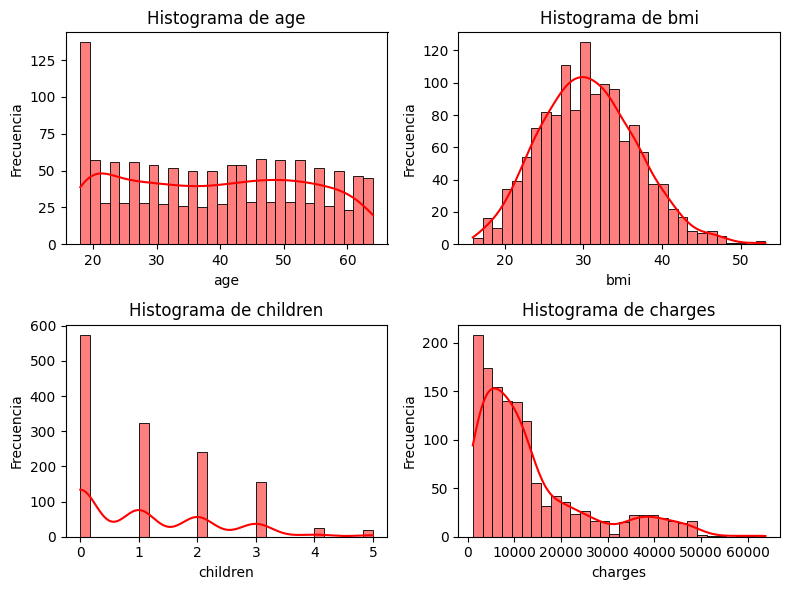

In [316]:
#Selecci√≥n de variables n√∫mericas.
variables_numericas = df.select_dtypes(include=['int64', 'float64']).columns

#Creaci√≥n y dise√±o de histogramas.
plt.figure(figsize=(8, 6))
for i, variable in enumerate(variables_numericas, 1):
  plt.subplot(2, 2, i)
  sns.histplot(df[variable], kde=True, bins=30, color='red')
  plt.title(f"Histograma de {variable}")
  plt.xlabel(variable)
  plt.ylabel("Frecuencia")

#Impresi√≥n de histogramas.
plt.tight_layout()
plt.show()

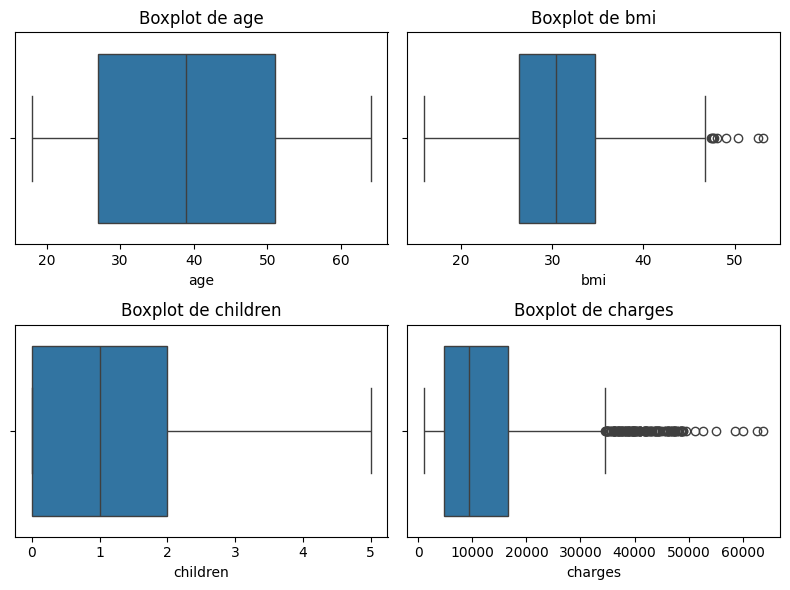

In [317]:
#Creaci√≥n y dise√±o de boxplots.
plt.figure(figsize=(8, 6))
for i, variable in enumerate(variables_numericas, 1):
  plt.subplot(2, 2, i)
  sns.boxplot(x=df[variable])
  plt.title(f"Boxplot de {variable}")

#Impresi√≥n de boxplots.
plt.tight_layout()
plt.show()

In [318]:
#Impresi√≥n de estad√≠sticas descrptivas.
print(df[variables_numericas].describe(), "\n")

#Impresi√≥n de modas.
print(df[variables_numericas].mode().iloc[0])

               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010 

age           18.0000
bmi           32.3000
children       0.0000
charges     1639.5631
Name: 0, dtype: float64


## **Variables Categ√≥ricas**

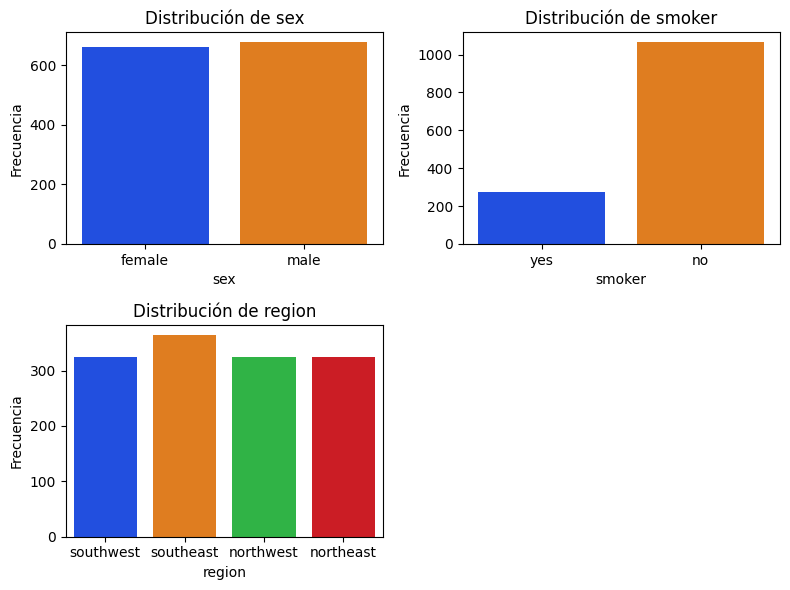

In [319]:
#Selecci√≥n de variables categ√≥ricas.
variables_categoricas = df.select_dtypes(include='object').columns

#Creaci√≥n y dise√±o de gr√°ficas de barras.
plt.figure(figsize=(8, 6))
for i, variable in enumerate(variables_categoricas, 1):
  plt.subplot(2, 2, i)
  sns.countplot(x=variable, data=df, hue=variable, palette='bright', legend=False)
  plt.title(f"Distribuci√≥n de {variable}")
  plt.xlabel(variable)
  plt.ylabel("Frecuencia")

#Impresi√≥n de gr√°ficas de barras.
plt.tight_layout()
plt.show()

# **Paso 3: Matriz de Correlaci√≥n**

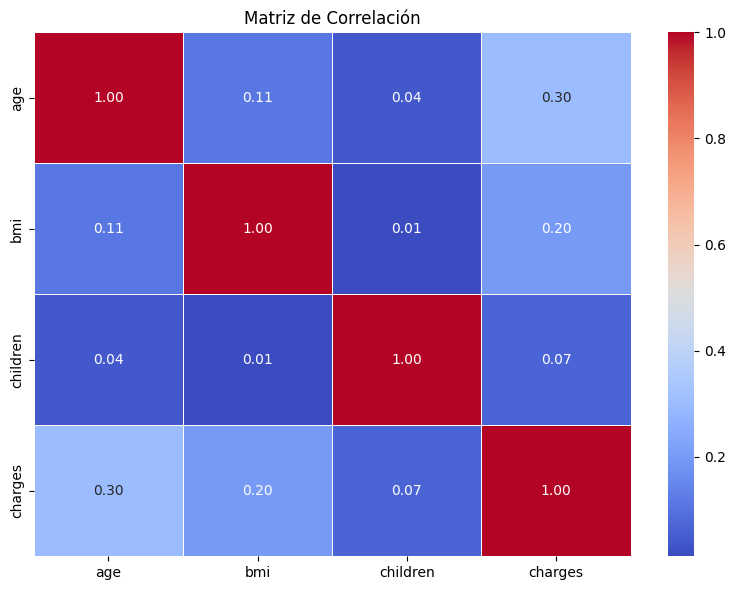

In [320]:
#C√°lculo de matriz de correlaci√≥n.
matriz_correlacion = df[variables_numericas].corr()

#Creaci√≥n y dise√±o de mapa de calor.
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Matriz de Correlaci√≥n")

#Impresi√≥n de mapa de calor.
plt.tight_layout()
plt.show()

üìå **Pregunta:** ¬øQu√© variables est√°n m√°s correlacionadas con el target (`charges`)? (salida del dataset) Las variables ‚Äúage‚Äù y ‚Äúbmi‚Äù, con un valor de 0.30 y 0.20 respectivamente.

# **Paso 4: Preprocesamiento**

In [321]:
#Impresi√≥n de valores nulos.
print(df.isnull().sum())

#Separaci√≥n de variable objetivo.
variables_numericas = variables_numericas.drop('charges')

#Creaci√≥n de preprocesador.
preprocesador = ColumnTransformer([
    ("categoricas", OneHotEncoder(drop='first'), variables_categoricas),
    ("numericas", StandardScaler(), variables_numericas)
])

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


# **Paso 5: Modelado (Lasso y Ridge)**

## **Lasso**

In [322]:
#Definici√≥n de par√°metro.
alpha_lasso = 0.1

#Creaci√≥n de pipeline.
lasso = Pipeline([("preprocesador", preprocesador), ("lasso", Lasso(alpha=alpha_lasso))])

#Definici√≥n de variables predictoras y variable objetivo.
x_lasso = df.drop(columns='charges')
y_lasso = df['charges']

#Entrenamiento del modelo.
lasso.fit(x_lasso, y_lasso)

#Evaluaci√≥n del modelo.
y_predicha_lasso = lasso.predict(x_lasso)
MSE_lasso = mean_squared_error(y_lasso, y_predicha_lasso)
R2_lasso = r2_score(y_lasso, y_predicha_lasso)

#Obtenci√≥n de coeficientes.
nombres_caracteristicas_lasso = list(variables_numericas)
nombres_caracteristicas_lasso += list(lasso.named_steps["preprocesador"].named_transformers_["categoricas"].get_feature_names_out())
coeficientes_lasso = pd.Series(lasso.named_steps["lasso"].coef_, index=nombres_caracteristicas_lasso)

#Impresi√≥n de resultados.
print(f"MSE: {MSE_lasso:.2f}")
print(f"R^2: {R2_lasso:.4f}\n")
print(coeficientes_lasso)

MSE: 36501893.68
R^2: 0.7509

age                  -130.858181
bmi                 23847.874353
children             -351.297677
sex_male            -1033.232811
smoker_yes           -958.346180
region_northwest     3607.401250
region_southeast     2067.478332
region_southwest      572.886722
dtype: float64


## **Ridge**

In [323]:
#Definici√≥n de par√°metro.
alpha_ridge = 1.0

#Creaci√≥n de pipeline.
ridge = Pipeline([("preprocesador", preprocesador), ("ridge", Ridge(alpha=alpha_ridge))])

#Definici√≥n de variables predictoras y variable objetivo.
x_ridge = df.drop(columns='charges')
y_ridge = df['charges']

#Entrenamiento del modelo.
ridge.fit(x_ridge, y_ridge)

#Evaluaci√≥n del modelo.
y_predicha_ridge = ridge.predict(x_ridge)
MSE_ridge = mean_squared_error(y_ridge, y_predicha_ridge)
R2_ridge = r2_score(y_ridge, y_predicha_ridge)

#Obtenci√≥n de coeficientes.
nombres_caracteristicas_ridge = list(variables_numericas)
nombres_caracteristicas_ridge += list(ridge.named_steps["preprocesador"].named_transformers_["categoricas"].get_feature_names_out())
coeficientes_ridge = pd.Series(ridge.named_steps["ridge"].coef_, index=nombres_caracteristicas_ridge)

#Impresi√≥n de resultados.
print(f"MSE: {MSE_ridge:.2f}")
print(f"R^2: {R2_ridge:.4f}\n")
print(coeficientes_ridge)

MSE: 36503887.63
R^2: 0.7509

age                  -124.200613
bmi                 23737.991359
children             -347.825073
sex_male            -1018.540799
smoker_yes           -952.384021
region_northwest     3604.096982
region_southeast     2064.858647
region_southwest      573.073125
dtype: float64


üìå **Pregunta:**  
- ¬øQu√© modelo tiene un mejor R¬≤? Ambos tienen el mismo valor de $R^2$. ¬øPor qu√© crees que ocurre esto? Es posible que se deba al valor que se le est√° asignando a "lambda", ya que es √©ste el par√°metro que hace la selecci√≥n de caracter√≠sticas de manera autom√°tica.
- ¬øQu√© variables tienen coeficientes cercanos a cero en Lasso? Ninguna. ¬øPor qu√©? Por el valor que tiene "lambda". Dado que es extremadamente bajo, se est√° tratando de asegurar de que todas las variables independientes se mantengan dentro del modelo.

# **Paso 6: Verificaci√≥n de Supuestos**

## **Lasso**

### **Linealidad y Homocedasticidad**

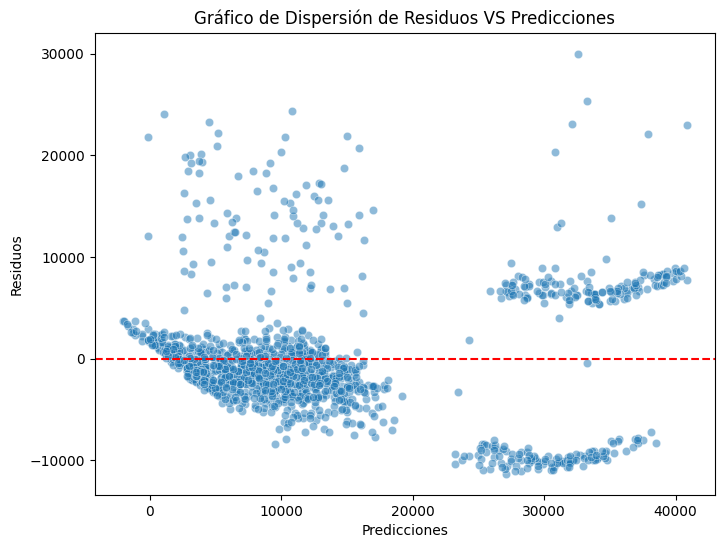

In [330]:
#C√°lculo de residuos.
residuos_lasso = y_lasso - y_predicha_lasso

#Creaci√≥n y dise√±o de gr√°fico de dispersi√≥n.
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_predicha_lasso, y=residuos_lasso, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicciones")
plt.ylabel("Residuos")
plt.title("Gr√°fico de Dispersi√≥n de Residuos VS Predicciones")

#Impresi√≥n de gr√°fico de dispersi√≥n.
plt.show()

### **Normalidad de Residuos**

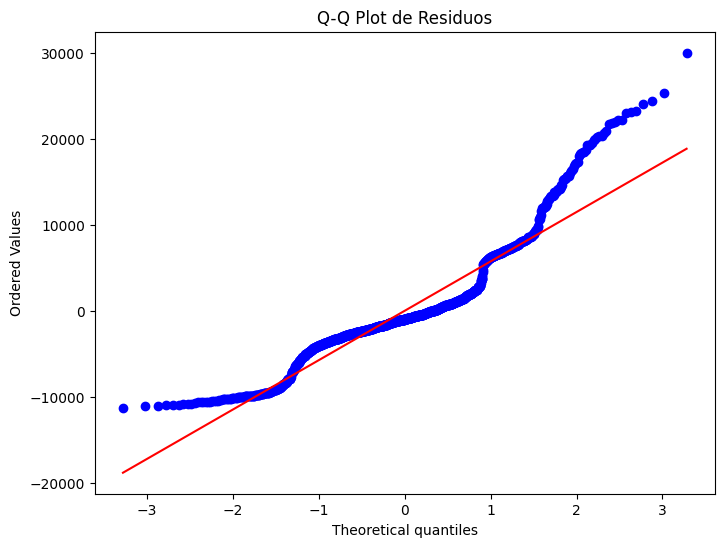


Prueba Shapiro-Wilk: p-valor = 8.3555e-29


In [331]:
#Creaci√≥n y dise√±o de Q-Q plot.
plt.figure(figsize=(8, 6))
stats.probplot(residuos_lasso, dist='norm', plot=plt)
plt.title("Q-Q Plot de Residuos")

#Impresi√≥n de Q-Q plot.
plt.show()

#C√°lculo e impresi√≥n de prueba de normalidad.
prueba_shapiro_lasso = stats.shapiro(residuos_lasso)
print(f"\nPrueba Shapiro-Wilk: p-valor = {prueba_shapiro_lasso.pvalue:.5}")

### **Multicolinealidad**

In [332]:
#C√°lculo de multicolinealidad.
constante_lasso = add_constant(df[variables_numericas])
datos_vif_lasso = pd.DataFrame()
datos_vif_lasso['Variable'] = constante_lasso.columns
datos_vif_lasso['VIF'] = [variance_inflation_factor(constante_lasso.values, i) for i in range(constante_lasso.shape[1])]

#Impresi√≥n de resultados.
print(datos_vif_lasso)

   Variable        VIF
0     const  31.954929
1       age   1.013816
2       bmi   1.012152
3  children   1.001874


## **Ridge**

### **Linealidad y Homocedasticidad**

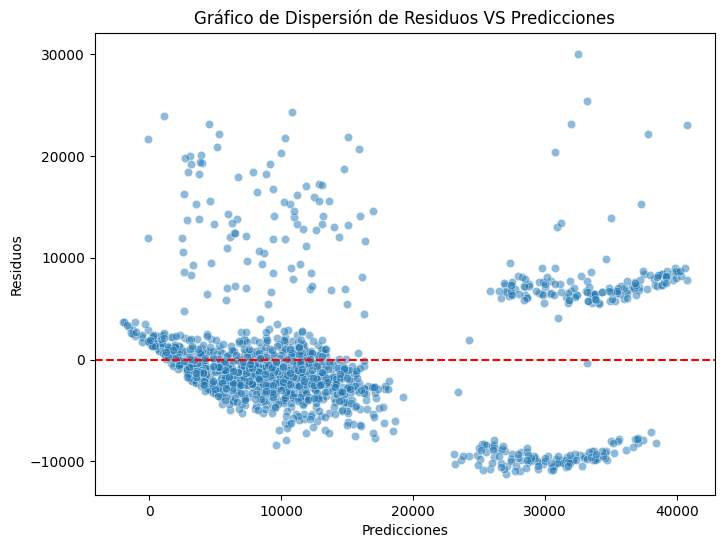

In [327]:
#C√°lculo de residuos.
residuos_ridge = y_ridge - y_predicha_ridge

#Creaci√≥n y dise√±o de gr√°fico de dispersi√≥n.
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_predicha_ridge, y=residuos_ridge, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicciones")
plt.ylabel("Residuos")
plt.title("Gr√°fico de Dispersi√≥n de Residuos VS Predicciones")

#Impresi√≥n de gr√°fico de dispersi√≥n.
plt.show()

### **Normalidad de Residuos**

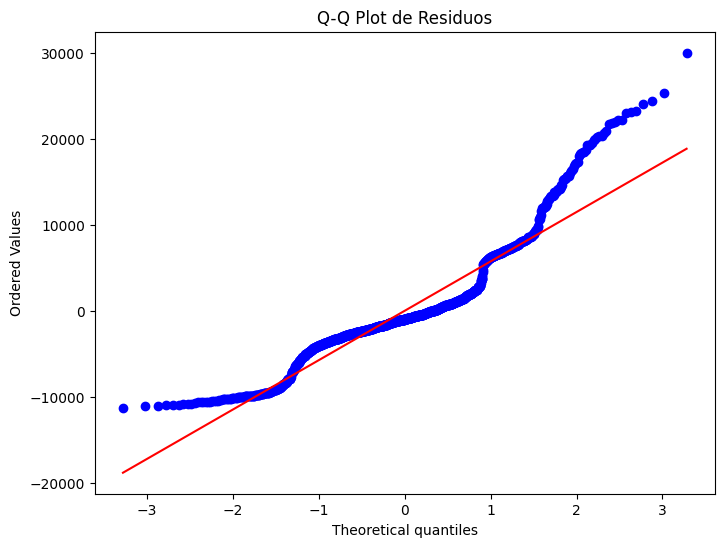


Prueba Shapiro-Wilk: p-valor = 6.4588e-29


In [328]:
#Creaci√≥n y dise√±o de Q-Q plot.
plt.figure(figsize=(8, 6))
stats.probplot(residuos_lasso, dist='norm', plot=plt)
plt.title("Q-Q Plot de Residuos")

#Impresi√≥n de Q-Q plot.
plt.show()

#C√°lculo e impresi√≥n de prueba de normalidad.
prueba_shapiro_ridge = stats.shapiro(residuos_ridge)
print(f"\nPrueba Shapiro-Wilk: p-valor = {prueba_shapiro_ridge.pvalue:.5}")

### **Multicolinealidad**

In [329]:
#C√°lculo de multicolinealidad.
constante_ridge = add_constant(df[variables_numericas])
datos_vif_ridge = pd.DataFrame()
datos_vif_ridge['Variable'] = constante_ridge.columns
datos_vif_ridge['VIF'] = [variance_inflation_factor(constante_ridge.values, i) for i in range(constante_ridge.shape[1])]

#Impresi√≥n de resultados.
print(datos_vif_ridge)

   Variable        VIF
0     const  31.954929
1       age   1.013816
2       bmi   1.012152
3  children   1.001874


üìå **Pregunta:**  
- ¬øSe cumplen los supuestos en ambos modelos? No, sin embargo, ambos modelos no presentan multicolinealidad.
- Si hay heterocedasticidad, ¬øc√≥mo podr√≠a solucionarse? Si, hay heterocedasticidad, ya que los residuos tienden a estar agrupados y dispersos para valores similares. Para resolver esto, se podr√≠a aplicar alg√∫n proceso de transformaci√≥n a las variables.

# **Paso 7: Comparaci√≥n Final**

üìä **Analizar:**  
- ¬øQu√© modelo es m√°s interpretable?  
- ¬øCu√°l reduce mejor el sobreajuste?  
- ¬øQu√© variables son m√°s importantes en cada caso?

Ambos modelos son muy similares. Tanto las m√©tricas como los valores de los coeficientes son casi id√©nticos. Cabe aclarar que se tiene la sospecha de que la transformaci√≥n de las variables no se est√° haciendo de manera adecuada; se debe realizar una revisi√≥n para descartar esta posibilidad. El c√≥digo no presenta problemas y la l√≥gica del procedimiento est√° basada en el laboratorio proporcionado, por lo que es necesario realizar una consulta con el docente para aclarar dudas.